<h1><b>mushrooms type classification

predict mushrooms type based on several features

<h4><b> Import library

In [25]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import pickle

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

<h4><b> Data Preparation

import dataframe

In [26]:
df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


do data encoding for dataframe

In [27]:
label = LabelEncoder()
for col in df.columns:
    df[col] = label.fit_transform(df[col])

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


see data distribution

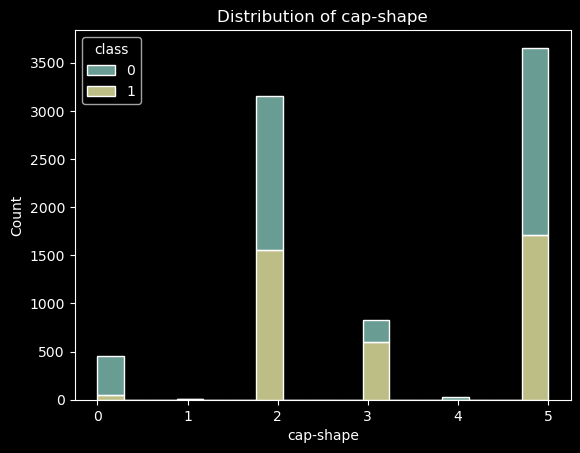

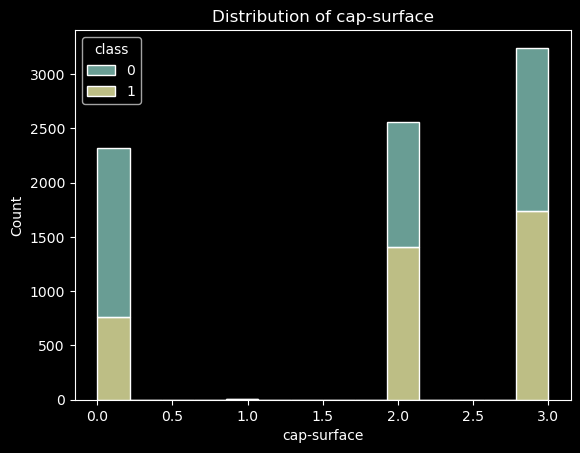

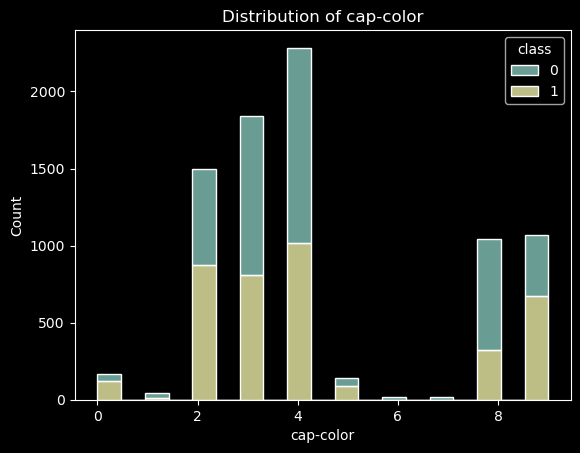

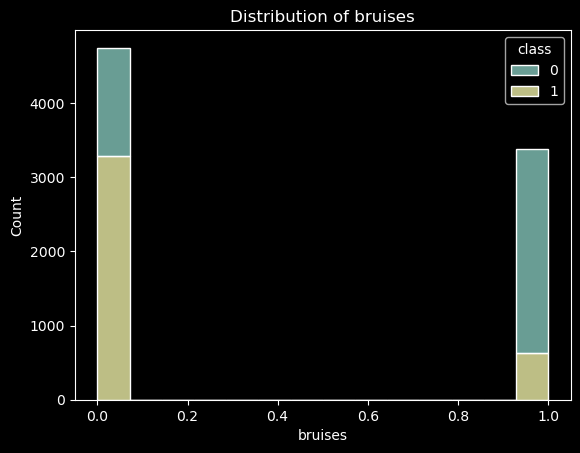

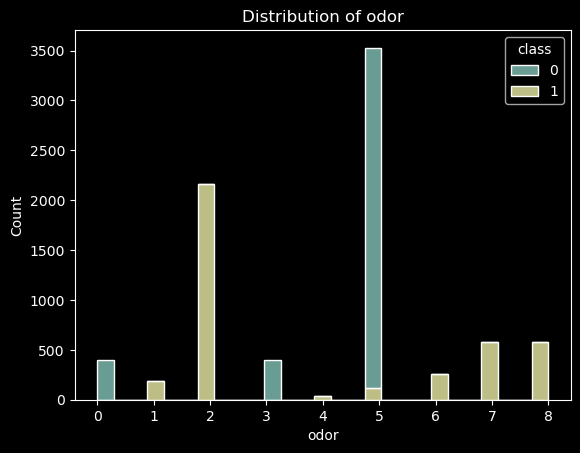

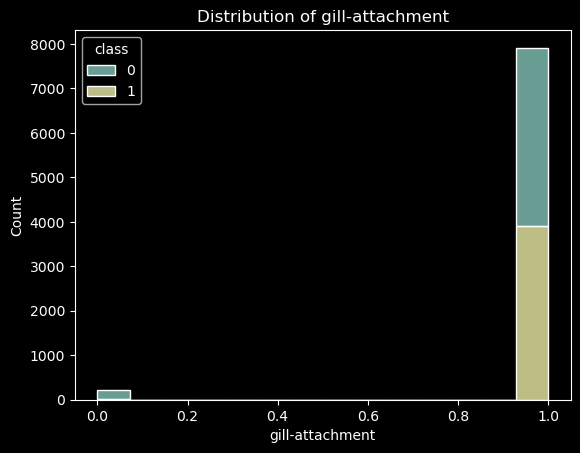

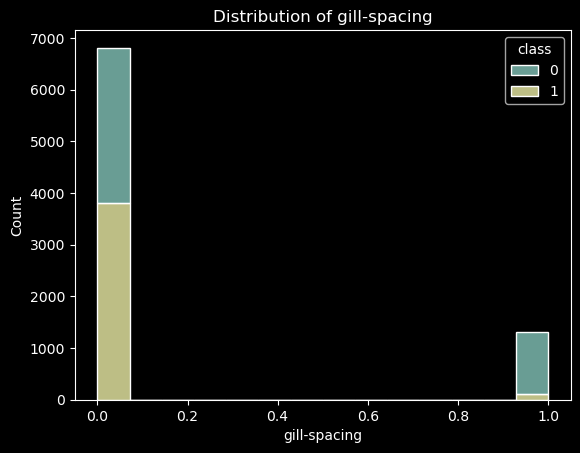

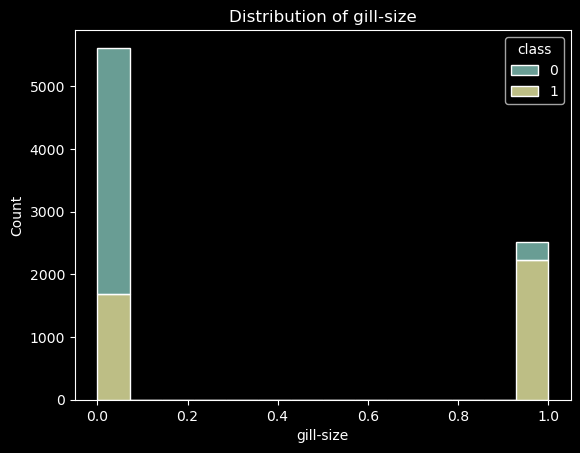

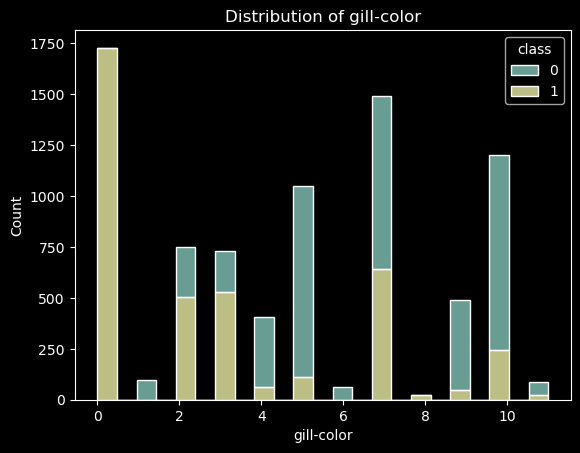

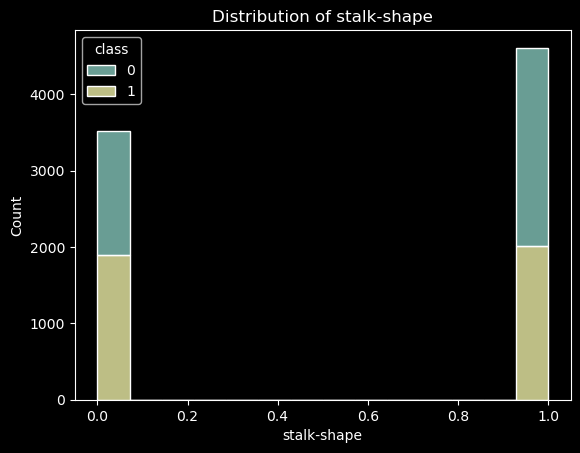

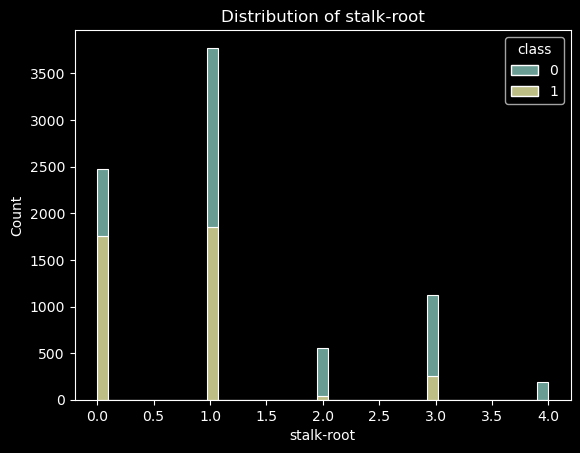

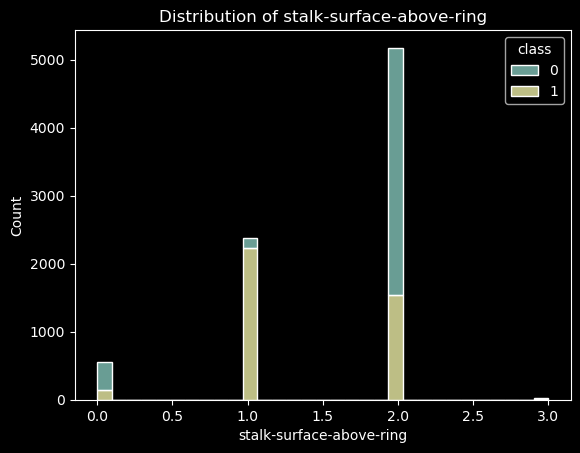

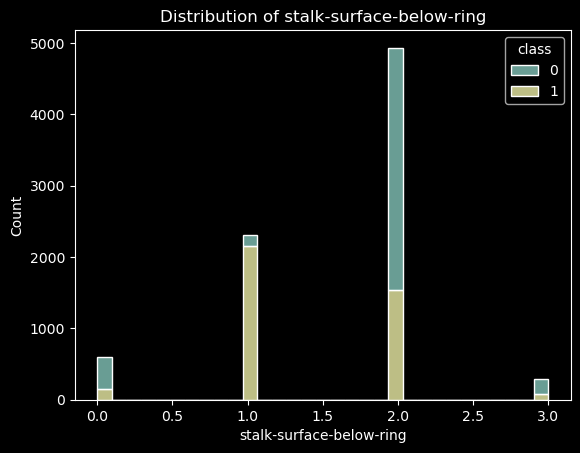

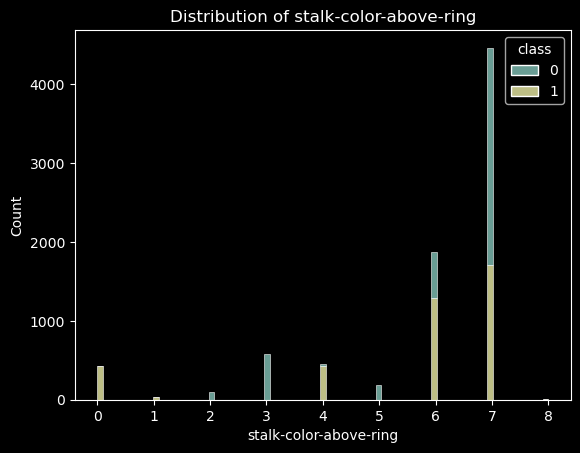

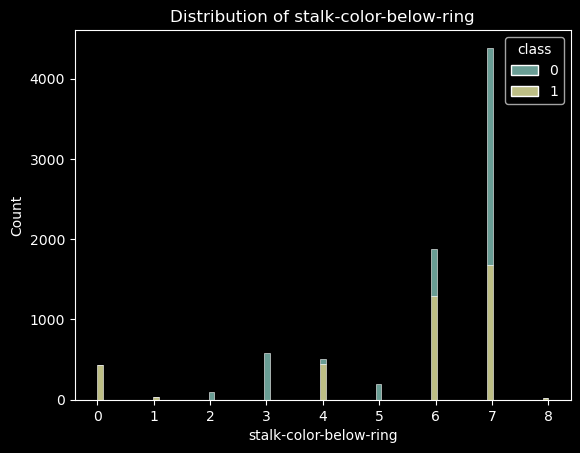

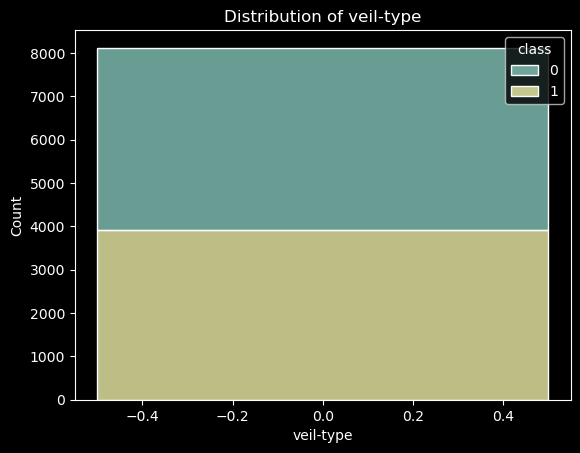

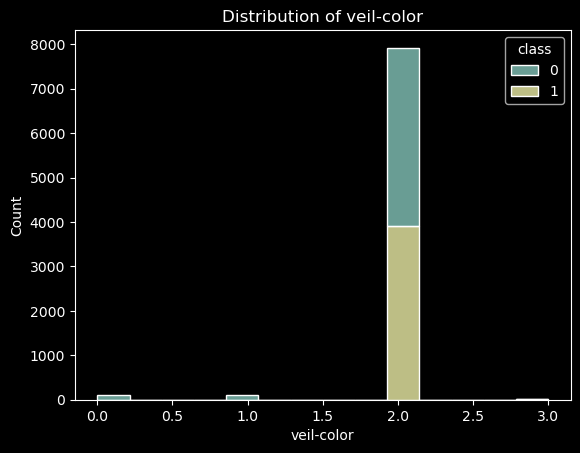

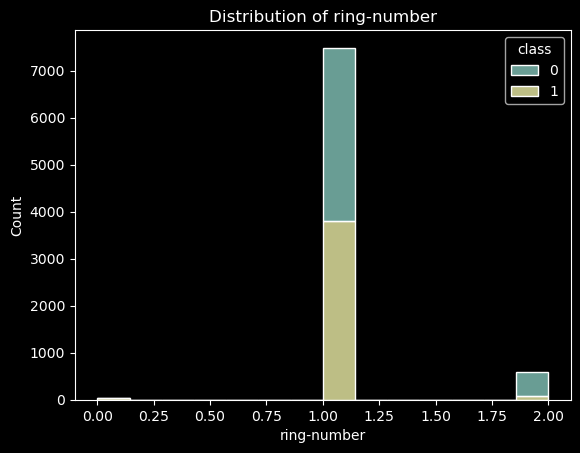

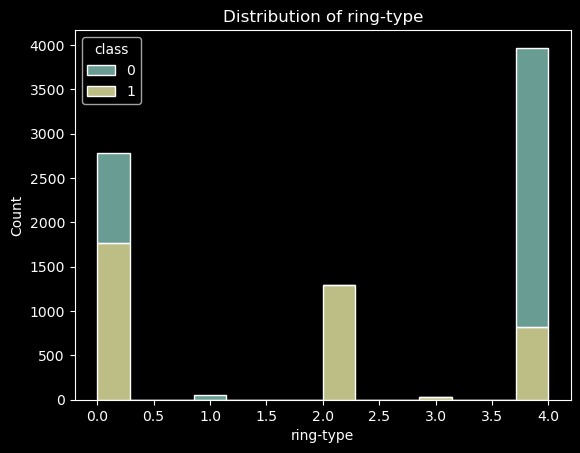

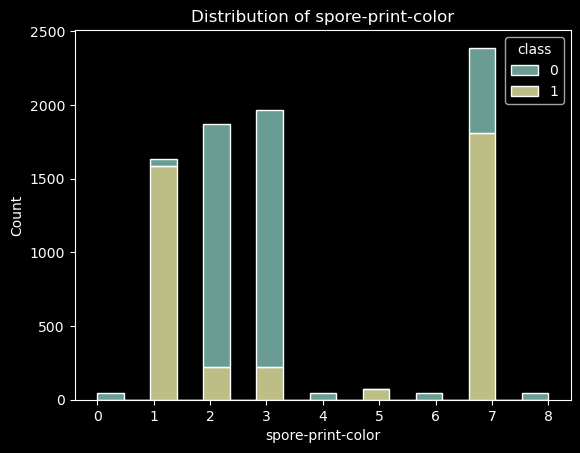

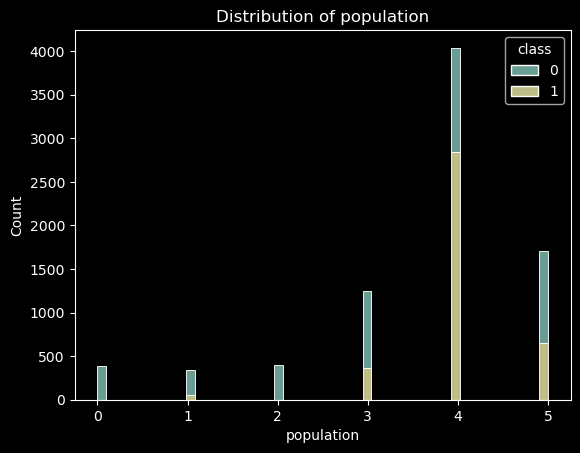

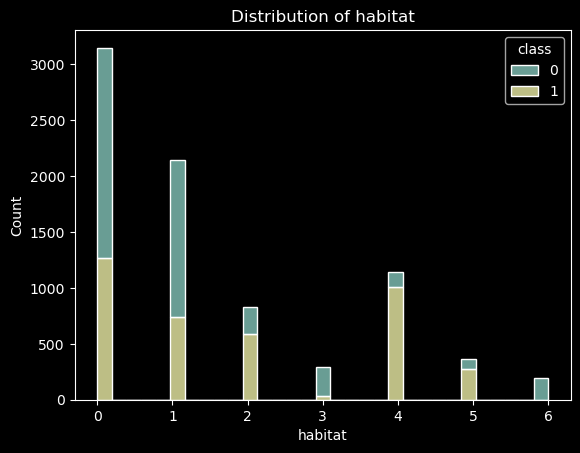

In [28]:
X = df.drop(["class"], axis="columns")

for column in X.columns:
    plt.figure()
    sns.histplot(data=df, x=column, hue='class', multiple='stack')
    plt.title(f'Distribution of {column}')
    plt.show()

because veil type has same value, we will drop it

In [29]:
df.drop(["veil-type"], axis="columns",inplace=True)

In [30]:
threshold = .001
selector = VarianceThreshold(threshold)

selector.fit(df)
feature_indices = selector.get_support()

df = df.iloc[:, feature_indices]

variance_scores = selector.variances_

for column, score in zip(df.columns, variance_scores):
    print(f"Variance score for {column}: {score}")

Variance score for class: 0.2496770272494697
Variance score for cap-shape: 2.5735549984593793
Variance score for cap-surface: 1.5124002384507393
Variance score for cap-color: 6.4804064814188544
Variance score for bruises: 0.24286969016191906
Variance score for odor: 4.4251312921503985
Variance score for gill-attachment: 0.025181147167209577
Variance score for gill-spacing: 0.1354155833230908
Variance score for gill-size: 0.21359814068545138
Variance score for gill-color: 12.532598793055257
Variance score for stalk-shape: 0.2454830482033649
Variance score for stalk-root: 1.1258074924829593
Variance score for stalk-surface-above-ring: 0.38616413585486026
Variance score for stalk-surface-below-ring: 0.4568848044866364
Variance score for stalk-color-above-ring: 3.6161975834438196
Variance score for stalk-color-below-ring: 3.637312934595018
Variance score for veil-color: 0.05888104154196851
Variance score for ring-number: 0.07346687641410427
Variance score for ring-type: 3.245622443460678
V

plotting features correlation and remove underperformed features

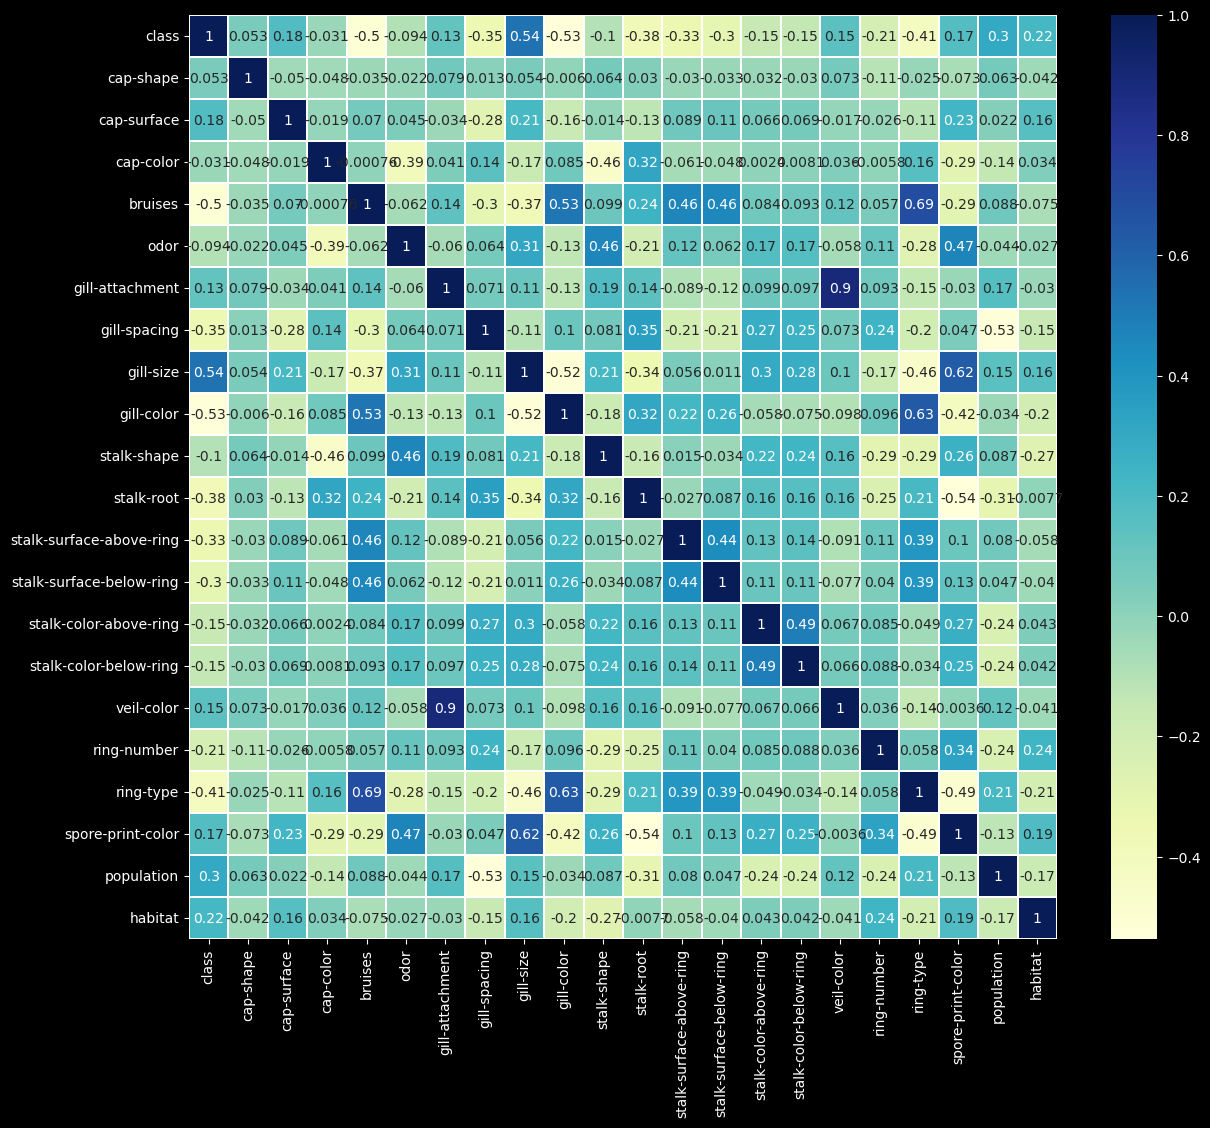

In [31]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [32]:
correlation_matrix = df.corr()

threshold = 0.7
highly_correlated = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated.append(colname)

df.drop(highly_correlated, axis=1, inplace=True)

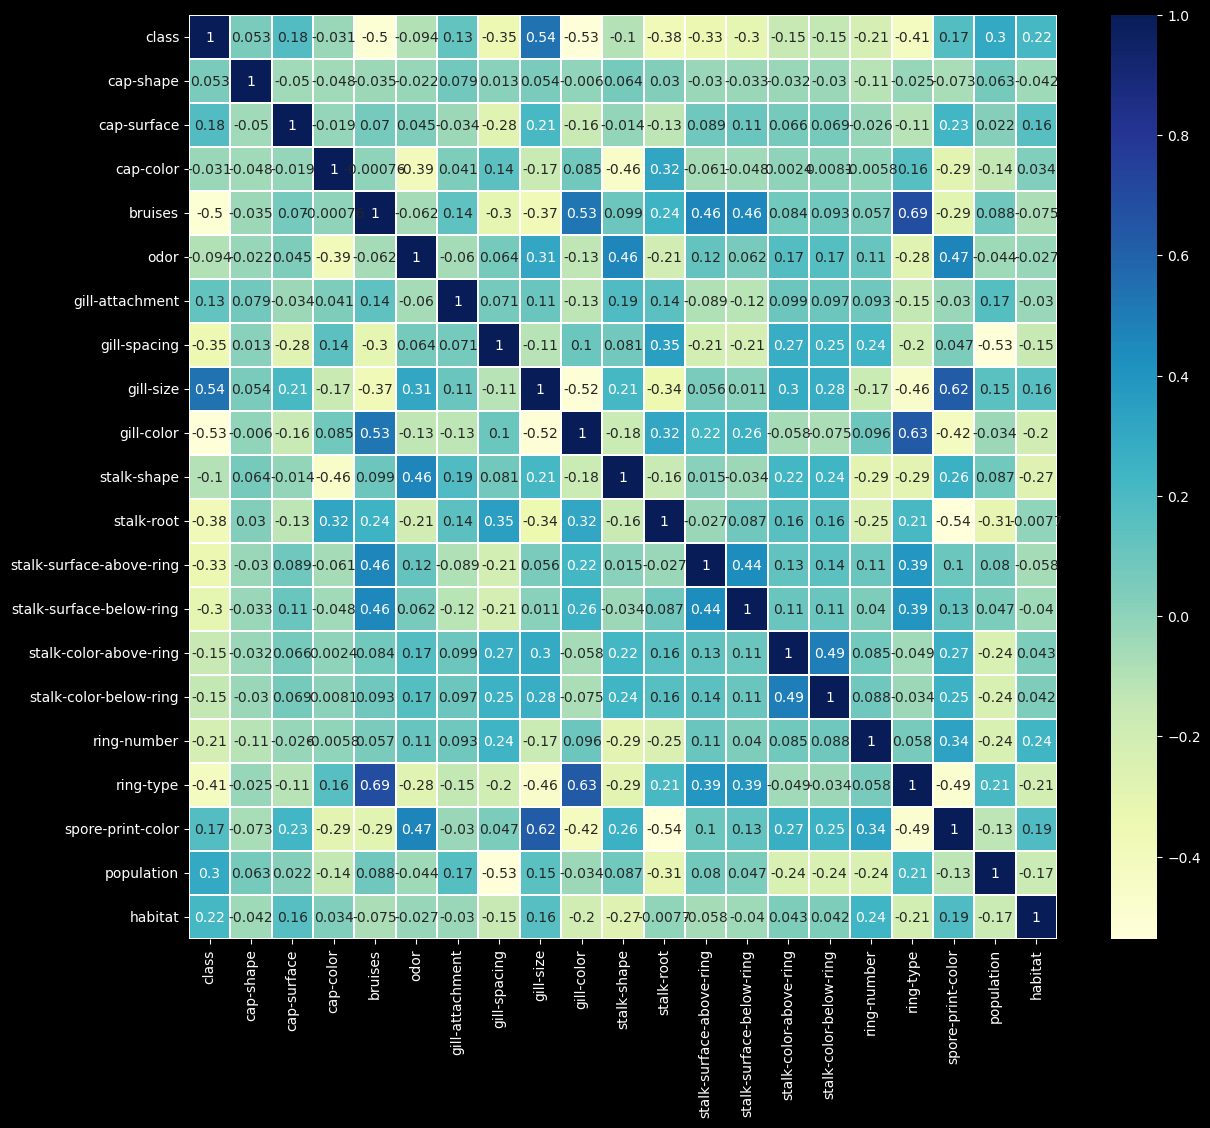

In [33]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [34]:
df = df[["class", "gill-color", "spore-print-color", "population", "gill-size", "odor", "bruises", "stalk-shape", "stalk-color-above-ring", "stalk-root"]]
X = df.drop(['class'], axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, random_state=42)

splitting data into features and target then training and testing

In [35]:
X = df.drop(['class'], axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, random_state=42)

<h4><b> Create decission tree classifier

In [36]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

features impact on classification

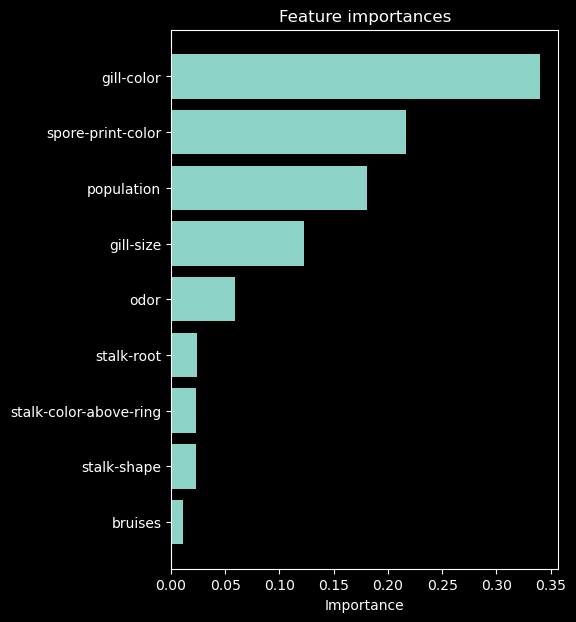

In [37]:
features_list = X.columns.values
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(5,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
plt.show()

In [38]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1167
           1       1.00      1.00      1.00      1108

    accuracy                           1.00      2275
   macro avg       1.00      1.00      1.00      2275
weighted avg       1.00      1.00      1.00      2275



In [39]:
pickle.dump(clf, open("decissiontree.pkl", "wb"))